Going to model the data here.

In [115]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')

hpx = [0, 24]
hpy = [150, 0]

In [116]:
ic = (0, 150)
ac = (100, .1, 1)

def func(x, GB, kr, GP, h=2.17, V=20):
    dB = GB/V - kr * x[0] * x[1] + h
    dP = GP/V - kr * x[0] * x[1] + h
    return(dB, dP)

def err(params):
    GB, kr, GP = params
    ODEoutputB = odeint(func, ic, data["time"], args = (GB, kr, GP))
    ODEoutputP = odeint(func, ic, hpx, args = (GB, kr, GP))
    err = (ODEoutputB[:,0] - data["Hp"])**2+(ODEoutputP[:,1] - hpy)**2
    return np.sum(err)

bounds = ([-100, 100], [0.001, 1], [-100, 100])
sol = minimize(err, x0 = ac)
print(sol)

ValueError: operands could not be broadcast together with shapes (24,) (2,) 

TypeError: bad operand type for unary -: 'tuple'

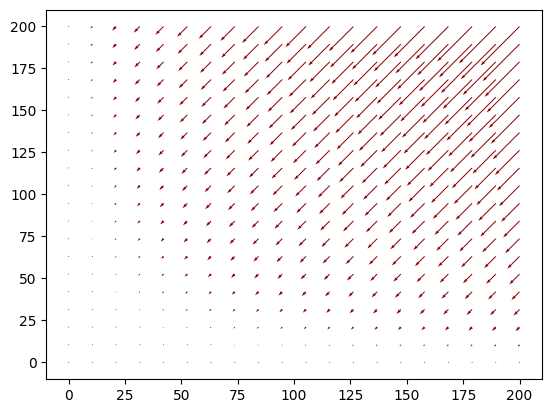

In [ ]:
plotdf(func, # Function giving the rhs of the diff. eq. system
     np.array([0,200]), # [xmin,xmax]
     np.array([0,200]),# [ymin,ymax]
     [(0,150)], # list of initial values for trajectories (optional)
     # Additional parameters for `f` (optional)
     parameters={"GB":50,"kr":0.3,"GP":0.01},
     gridsteps=20,
     nsteps = 10000,
     tmax=20)

plt.xlabel("B, concentration of hemoglobin (g/dL)")
plt.ylabel("P, concentration of haptoglobin (g/dL)")

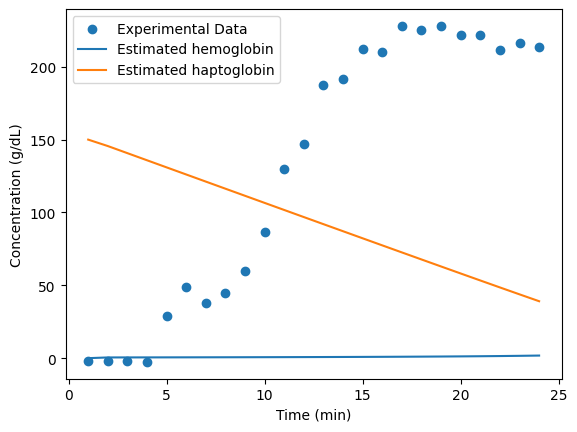

In [ ]:
fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1], sol.x[2]))
plt.scatter(data["time"], data['Hp'], label = "Experimental Data")
plt.plot(data["time"], fitdata[:,0], label = "Estimated hemoglobin")
plt.plot(data["time"], fitdata[:,1], label = "Estimated haptoglobin")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (g/dL)")
plt.legend()